In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [50]:
df.shape

(299, 13)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'DEATH_EVENT') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                     feature        VIF
0                        age  29.114744
1                    anaemia   1.909994
2   creatinine_phosphokinase   1.448473
3                   diabetes   1.789419
4          ejection_fraction  12.081364
5        high_blood_pressure   1.646044
6                  platelets   8.641813
7           serum_creatinine   2.919913
8               serum_sodium  59.151991
9                        sex   3.795155
10                   smoking   1.892753
11                      time   4.351441


In [53]:
df=df.drop(['serum_sodium'], axis=1)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'DEATH_EVENT') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                     feature        VIF
0                        age  16.112034
1                    anaemia   1.853914
2   creatinine_phosphokinase   1.401969
3                   diabetes   1.743958
4          ejection_fraction  10.250244
5        high_blood_pressure   1.619748
6                  platelets   7.503041
7           serum_creatinine   2.893221
8                        sex   3.612712
9                    smoking   1.890370
10                      time   3.636697


In [55]:
df=df.drop(['age'], axis=1)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'DEATH_EVENT') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                    feature       VIF
0                   anaemia  1.775200
1  creatinine_phosphokinase  1.397940
2                  diabetes  1.734687
3         ejection_fraction  7.897831
4       high_blood_pressure  1.561065
5                 platelets  6.771772
6          serum_creatinine  2.617986
7                       sex  3.246439
8                   smoking  1.890053
9                      time  3.576229


In [57]:
df=df.drop(['ejection_fraction'], axis=1)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'DEATH_EVENT') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                    feature       VIF
0                   anaemia  1.697876
1  creatinine_phosphokinase  1.390169
2                  diabetes  1.720535
3       high_blood_pressure  1.516495
4                 platelets  5.429803
5          serum_creatinine  2.485459
6                       sex  3.193581
7                   smoking  1.889738
8                      time  3.155109


In [59]:
col_list=list(df.columns)
for col in col_list:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

In [60]:
df.shape

(228, 10)

In [63]:
for col_name in col_list:
    if df[col_name].dtypes=='object':
        #print('ob')
        df[col_name] = df[col_name].fillna(df[col_name].mode()[0])
    else:
        #print('num')
        df[col_name] = df[col_name].fillna(df[col_name].mean())

In [64]:
df.shape

(228, 10)

In [66]:
df.groupby('anaemia')['DEATH_EVENT'].count()

anaemia
0    122
1    106
Name: DEATH_EVENT, dtype: int64

In [67]:
df.columns

Index(['anaemia', 'creatinine_phosphokinase', 'diabetes',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'sex',
       'smoking', 'time', 'DEATH_EVENT'],
      dtype='object')

In [68]:
cat_columns=['anaemia','diabetes','high_blood_pressure','sex','smoking']
num_columns=['creatinine_phosphokinase','platelets', 'serum_creatinine','time']

In [69]:
from sklearn.feature_selection import f_classif, SelectKBest

In [70]:
X=df[num_columns].to_numpy()
Y=df['DEATH_EVENT'].to_numpy()

In [89]:
fs = SelectKBest(k=2, score_func = f_classif)
X_selected = fs.fit_transform(X,Y)

In [90]:
fs.get_support(True)

array([1, 4], dtype=int64)

In [78]:
X = df[cat_columns].to_numpy()
Y=df['DEATH_EVENT'].to_numpy()

In [100]:
from sklearn.feature_selection import chi2
fs = SelectKBest(k=3,score_func=chi2)
X_selected = fs.fit_transform(X,Y)
fs.get_support(True)

array([1, 3, 4], dtype=int64)

In [110]:
cat_column_selected=['anaemia','diabetes','high_blood_pressure','sex','smoking']
num_columns_selected=['creatinine_phosphokinase','platelets', 'serum_creatinine',]

In [111]:
total_feature=cat_column_selected +num_columns_selected

In [112]:
X=df[total_feature].to_numpy()
Y=df['DEATH_EVENT'].to_numpy()

In [113]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_scaled=scale.fit_transform(X)

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y, test_size=0.2,shuffle =True)

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [117]:
y_pred = clf.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(f'Accuracy of the classifier is {accuracy_score(y_test,y_pred)*100}')

Accuracy of the classifier is 71.73913043478261


In [119]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[29,  0],
       [13,  4]], dtype=int64)

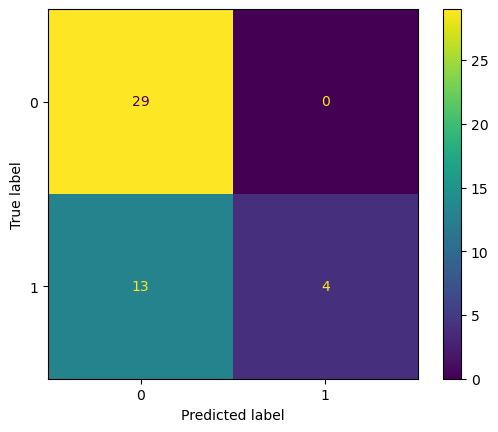

In [121]:
ConfusionMatrixDisplay(cm).plot()

In [122]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

(array([0.69047619, 1.        ]),
 array([1.        , 0.23529412]),
 array([0.81690141, 0.38095238]),
 array([29, 17], dtype=int64))